# 1회차: 통계적 사고와 기술통계

## 목차

| 순서 | 파트 | 주제 | 핵심 내용 |
|------|------|------|----------|
| 1 | Part 1 | 핵심 정리 | 기술/추론통계 비교, 데이터 유형, 측정 척도, 시각화 가이드 |
| 2 | Part 2 | 데이터 유형 탐색 | Iris·Wine 데이터로 수치형/범주형 구분, dtypes, describe(), value_counts() |
| 3 | Part 3 | 범주 데이터 | 최빈값, 막대도표, 파이차트 |
| 4 | Part 4 | 중심 지표 (대표값) | 산술평균, 절사평균, 가중평균, 중앙값, 최빈값 + 이상치 영향 비교 |
| 5 | Part 5 | 산포도 | 편차, 분산, 표준편차, 범위, IQR, 이상치 판별 + 베셀 보정(N-1) |
| 6 | Part 6 | 데이터 분포 탐색 | 박스플롯, 히스토그램, KDE, 바이올린 도표 (4가지 시각화) |
| 7 | Part 7 | 왜도와 첨도 | 왜도(비대칭), 첨도(꼬리 두께), 꼬리 리스크 개념 |

> **실습 과제**는 별도 파일 `practice_01_assignment.ipynb`에 있습니다.

---

## Part 1: 핵심 정리

### 1. 기술통계 vs 추론통계

| 구분 | 기술통계 (Descriptive) | 추론통계 (Inferential) |
|------|----------------------|----------------------|
| **뭘 하는 건가?** | 데이터를 요약하고 그래프로 보여주기 | 일부 데이터로 전체를 짐작하기 |
| **보는 대상** | 내가 가진 데이터 그 자체 | 전체 (모집단) |
| **쓰는 도구** | 평균, 중앙값, 그래프 등 | 가설검정, 신뢰구간, 회귀분석 등 |
| **예시** | "우리 반 시험 평균은 75점이야" | "이 약이 진짜 효과가 있을까?" |
| **확실한가?** | 확실함 (그냥 숫자 정리) | 불확실함 (확률로 판단) |

### 2. 데이터 유형 & 측정 척도

데이터 유형(형태)과 측정 척도(성질)는 서로 다른 분류이지만, 아래처럼 주로 짝지어집니다.

| 측정 척도 | 주로 해당하는 데이터 유형 | 순서 | 간격 동일 | 0=없음 | 쉬운 설명 | 예시 | 가능한 연산 |
|----------|----------------------|:----:|:--------:|:-----:|----------|------|-----------|
| **명목 척도** | 범주형 - 명목형 | X | X | X | 그냥 이름표. 숫자 붙여도 의미 없음 | 성별, 혈액형, 우편번호 | 빈도, 최빈값 |
| **순서 척도** | 범주형 - 순서형 | O | X | X | 순서는 있지만 간격이 같진 않음 | 학점(A>B>C), 만족도(1~5), 등수 | + 중앙값, 순위비교 |
| **등간 척도** | 수치형 (특수한 경우) | O | O | X | 간격은 동일. 하지만 0이 "없음"이 아님 | 온도(0°C≠온도없음), IQ, 연도 | + 평균, 표준편차 |
| **비율 척도** | 수치형 (대부분의 수치 데이터) | O | O | O | 0이 진짜 "없음". 비율 계산 가능 | 키, 무게, 나이, 소득, 개수 | + 비율("2배") |

> **참고**: 등간 vs 비율의 구분은 **"0이 진짜 없음을 뜻하는가?"** 입니다.
> - 키 0cm = 키가 없음(비율) / 온도 0°C = 온도가 없는 게 아님(등간)
> - 실제 데이터 분석에서 마주치는 수치형 데이터의 대부분(키, 무게, 금액, 개수 등)은 **비율 척도**입니다.

**왜 척도가 중요할까요?**
- **명목** → 평균 구하면 안 됨! (혈액형 평균 = 의미 없음)
- **순서** → 원칙적으로 평균 부적절 (간격이 동일하다는 보장 없음)
  - 단, 설문 점수(만족도 1~5점 등)는 실무에서 등간으로 간주하고 평균을 구하는 것이 관행
- **등간** → 평균은 OK, 하지만 "2배"라는 표현은 틀림 (20°C가 10°C보다 2배 뜨거운 건 아님)
- **비율** → 모든 연산 가능 (몸무게 80kg은 40kg의 2배 맞음)
- **아래로 갈수록 더 많은 연산이 가능** (누적 구조): 명목 < 순서 < 등간 < 비율

### 3. 데이터 유형별 시각화 가이드

#### 단변량 분석 (단일 변수 시각화)

| 데이터 유형 | 시각화 | 목적 | 용도 | 언제 쓰나? |
|------------|--------|------|------|-----------|
| **수치형 (연속)** | 히스토그램 | 분포 | 분포 형태 확인 (어디에 몰려 있나) | 데이터 분포를 처음 파악할 때 |
| | KDE (밀도그림) | 분포 | 부드러운 분포 곡선 | 여러 그룹의 분포를 겹쳐 비교할 때 |
| | 박스플롯 | 분포 | 5요약(Q1,중앙값,Q3,최소,최대) + 이상치 | 중심·퍼짐·이상치를 한눈에 파악할 때 |
| | 바이올린 도표 | 분포 | 분포 형태 + 요약 통계 | 박스플롯 + 밀도를 동시에 보고 싶을 때 |
| **수치형 (이산)** | 막대그래프 | 비교 | 각 정수 값의 빈도 | 값이 정수인 경우 (평점 1~5, 자녀 수 등) |
| **범주형 (명목)** | 막대그래프 | 비교 | 카테고리별 빈도 비교 | 남/여, 혈액형, 탑승항 등 그룹 크기 비교 |
| | 파이차트 | 구성 | 전체 대비 비율 강조 | 항목이 적고(5개 이하) 비율 강조할 때 |
| | 도넛 차트 | 구성 | 파이차트 변형, 중앙에 정보 표시 | 핵심 수치를 중앙에 강조할 때 |
| | 트리맵 | 구성 | 계층적 비율을 면적으로 표현 | 항목이 많거나 계층 구조가 있을 때 |
| | 와플 차트 | 구성 | 비율을 격자로 직관 표현 | 파이차트 대안, 퍼센트 강조할 때 |
| **범주형 (순서)** | 막대그래프 (순서 유지) | 비교 | 순서 + 빈도 확인 | 학점, 만족도, 등급 등 순서가 있는 범주 |

#### 이변량 분석 (두 변수 조합 시각화)

| 데이터 조합 | 시각화 | 목적 | 용도 | 언제 쓰나? |
|------------|--------|------|------|-----------|
| **수치 × 수치** | 산점도 (Scatter) | 관계 | 두 변수의 관계 확인 | 상관관계, 군집, 이상치 패턴 확인 |
| | 히트맵 (상관행렬) | 관계 | 여러 변수 상관관계 한눈에 | 변수가 많을 때 전체 관계를 색깔로 파악 |
| **수치 × 범주** | 그룹별 박스플롯 | 비교/분포 | 그룹 간 분포 비교 | 남녀별 키, 등급별 요금 등 |
| | 그룹별 바이올린 | 비교/분포 | 그룹 간 분포 + 형태 비교 | 분포 형태까지 세밀하게 비교할 때 |
| | 그룹별 히스토그램 | 비교/분포 | 그룹 분포 겹쳐 비교 | 분포의 겹침/분리 정도 확인 |
| **시간 × 수치** | 선 그래프 (Line) | 비교 | 시간에 따른 변화 추세 | 매출 추이, 기온 변화, 주가 등 |
| | 영역 그래프 (Area) | 비교/구성 | 추세 + 누적 크기 강조 | 카테고리별 매출 누적 추이 |
| | 다중 축 차트 (Multi-Axis) | 비교 | 스케일이 다른 변수를 겹쳐 비교 | 매출(억) vs 고객수(명) 동시 비교 |
| **범주 × 범주** | 누적 막대그래프 | 구성 | 교차 빈도/비율 | 성별×생존, 등급×탑승항 등 |
| | 모자이크 플롯 | 구성 | 교차 비율 (면적) | 두 범주 변수의 관계를 면적으로 표현 |

### 💡 실무 꿀팁
- 숫자만 보면 이상치, 분포 형태, 패턴 등을 놓치기 쉽습니다. 분석 시 수치만 확인하지 말고 항상 시각화를 수행하세요.

### 4. 기술통계 핵심 요약

| 분류 | 통계량 | 쉬운 설명 | 이상치에 흔들리나? |
|------|--------|----------|:----------------:|
| **중심 지표** | 평균 (Mean) | 전부 더해서 개수로 나누기 | 많이 흔들림 |
| *(대표 선수)* | 중앙값 (Median) | 줄 세운 다음 한가운데 값 | 거의 안 흔들림 |
| | 절사평균 (Trimmed Mean) | 양쪽 극단값 빼고 평균 | 조금 흔들림 |
| **산포도** | 분산 (Variance) | 평균에서 얼마나 떨어져 있나 (제곱) | 많이 흔들림 |
| *(얼마나 퍼져 있나)* | 표준편차 (Std Dev) | 분산에 루트 씌운 것 (원래 단위) | 많이 흔들림 |
| | IQR | 상위 25% 값 - 하위 25% 값 | 거의 안 흔들림 |
| | 변동계수 (CV) | 표준편차 ÷ 평균 (상대적 퍼짐, %) | 많이 흔들림 |
| **분포 모양** | 왜도 (Skewness) | 좌우 대칭인가, 한쪽으로 치우쳤나 | - |
| | 첨도 (Kurtosis) | 꼬리가 두꺼운가, 얇은가 (극단값 빈도) | - |

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris, load_wine
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 전역 시드 설정 (재현성을 위해)
np.random.seed(42)

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


---

## Part 2: 데이터 유형 탐색

### sklearn 데이터셋으로 수치형/범주형 데이터 구분해보기

데이터 분석의 첫 단계는 **"내 데이터가 어떤 종류인지"** 파악하는 것입니다.

- **수치형**: 숫자로 되어 있고 계산할 수 있는 데이터 (키, 몸무게, 점수)
- **범주형**: 그룹/카테고리를 나타내는 데이터 (성별, 혈액형, 품종)

In [2]:
print("\n" + "="*60)
print("Part 2: 데이터 유형 탐색")
print("="*60)

# (1) Iris(붓꽃) 데이터 로드
# - 붓꽃 150송이의 꽃잎/꽃받침 크기를 측정한 유명한 데이터
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({
    0: 'setosa', 1: 'versicolor', 2: 'virginica'
})


# (2) 데이터 칼럼 및 타입 확인
iris_df.info() # 수치형, 범주형 구분
display(iris_df.head()) # 샘플 데이터 확인

# (3) 수치형 데이터의 기술 통계를 한눈에 파악하기 위한 함수
display(iris_df.describe().round(2))

# (4) 범주형의 기술 통계를 한눈에 파악하기 위한 함수
display(iris_df.describe(include=['object', 'category']).round(2))

# (5) 범주형 데이터 빈도 확인
display(iris_df['species_name'].value_counts())
display(iris_df['species_name'].value_counts(normalize=True).round(2)) # 범주의 비율


Part 2: 데이터 유형 탐색
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    str    
dtypes: float64(4), int64(1), str(1)
memory usage: 7.2 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


,species_name
count,150
unique,3
top,setosa
freq,50


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

species_name
setosa        0.33
versicolor    0.33
virginica     0.33
Name: proportion, dtype: float64

In [3]:
print("\n" + "="*60)
print("Wine 데이터 유형 탐색")
print("="*60)

# (1) Wine(와인) 데이터 로드
# - 이탈리아 3개 지역 와인 178개의 화학 성분을 분석한 데이터
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target
wine_df['class_name'] = wine_df['class'].map({
    0: 'class_0', 1: 'class_1', 2: 'class_2'
})

# (2) 데이터 칼럼 및 타입 확인
wine_df.info()  # 수치형, 범주형 구분
display(wine_df.head())  # 샘플 데이터 확인

# (3) 수치형 데이터의 기술 통계를 한눈에 파악하기 위한 함수
display(wine_df.describe().round(2))

# (4) 범주형의 기술 통계를 한눈에 파악하기 위한 함수
display(wine_df.describe(include=['object', 'category']).round(2))

# (5) 범주형 데이터 빈도 확인
display(wine_df['class_name'].value_counts())
display(wine_df['class_name'].value_counts(normalize=True).round(2)) # 범주의 비율


Wine 데이터 유형 탐색
<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


,class_name
count,178
unique,3
top,class_1
freq,71


class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

class_name
class_1    0.40
class_0    0.33
class_2    0.27
Name: proportion, dtype: float64

---

## Part 3: 기술통계 - 범주 데이터

### 범주형 데이터 → 빈도 세기, 막대/파이차트

| 시각화 | 용도 | 언제 쓰나? |
|--------|------|-----------|
| 막대그래프 | 카테고리별 빈도/크기 비교 | 항목 간 크기를 직접 비교할 때 |
| 파이차트 | 전체 대비 비율 강조 | 항목이 적고(5개 이하) 비율을 강조할 때 |

> **선택 기준**: 비교가 목적이면 막대그래프, 비율 강조가 목적이면 파이차트

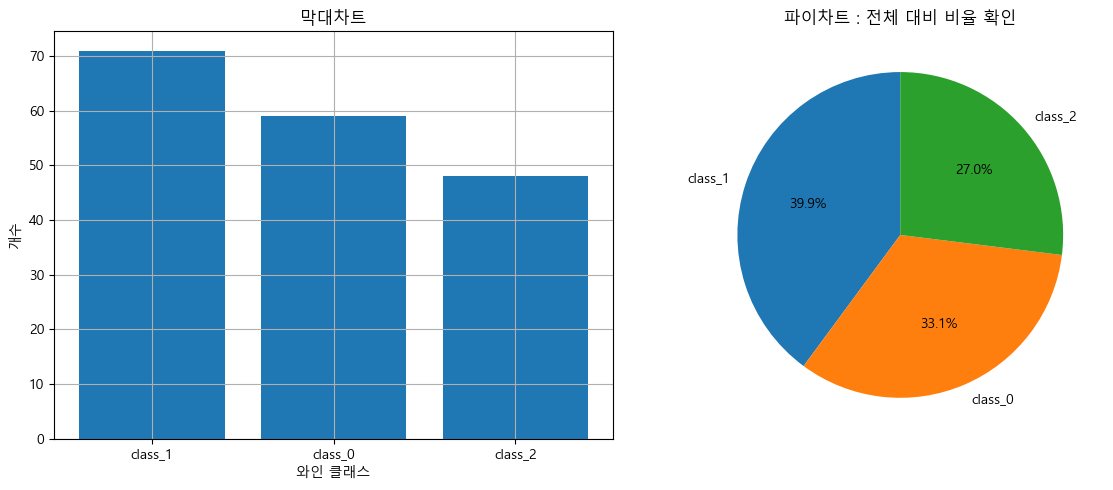

In [8]:
# 범주 데이터 시각화: 막대도표 & 파이차트
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #1행 2열 1*2그래프 그림

# 데이터를 준비
class_counts = wine_df['class_name'].value_counts()

# 막대 차트
axes[0].bar(class_counts.index, class_counts.values)
axes[0].set_xlabel('와인 클래스')
axes[0].set_ylabel('개수')
axes[0].set_title('막대차트')
axes[0].grid(True)

# 파이 차트
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%.1f%%', startangle=90)
axes[1].set_title("파이차트 : 전체 대비 비율 확인")

plt.tight_layout()
plt.show()

## Part 4: 기술통계 - 중심 지표 (대표값)

### "이 데이터를 숫자 하나로 요약하면?" → 평균, 중앙값, 최빈값, 절사평균, 가중평균

데이터를 대표하는 값을 구하는 방법은 여러 가지입니다. 각각 장단점이 있어서, 상황에 맞게 골라 써야 합니다.

#### 수식 정리
- **산술평균**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$
- **중앙값**: 정렬 후 $n$이 홀수면 $x_{(n+1)/2}$, 짝수면 $\frac{x_{n/2} + x_{n/2+1}}{2}$
- **최빈값**: 빈도가 가장 높은 값 (수식 없이 세기만 하면 됨)
- **절사평균**: 상하 $p\%$를 제거한 후 나머지의 산술평균
- **가중평균**: $\bar{x}_w = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i}$

#### 대표값 비교

| 대표값 | 장점 | 단점 | 언제 쓰나? |
|--------|------|------|-----------|
| **산술평균** | 계산이 쉽고 직관적, 모든 데이터 반영 | 이상치에 매우 민감 | 대칭 분포, 이상치 없을 때 |
| **중앙값** | 이상치에 강건함 | 극단값 정보 무시 | 비대칭 분포, 이상치 있을 때 (연봉, 집값) |
| **최빈값** | 범주형 데이터에 유일한 선택 | 수치형에서 의미 약함, 여러 개 존재 가능 | 범주형 데이터 (혈액형, 선호도) |
| **절사평균** | 이상치 영향 줄이면서 평균의 장점 유지 | 절사 비율 선택이 주관적 | 평가 점수 (피겨스케이팅, 심사) |
| **가중평균** | 중요도 차이 반영 가능 | 가중치 설정이 주관적 | 학점 계산, 포트폴리오 수익률 |

---

### 분포 형태에 따른 평균·중앙값·최빈값의 위치 관계

![평균_중앙값_최빈값](images/pr_01/평균_중앙값_최빈값.png)

| 분포 형태 | 위치 관계 | 실제 예시 |
|----------|----------|----------|
| **음의 왜도** (왼쪽 꼬리) | 최빈값 > 중앙값 > 평균 | 쉬운 시험 점수 (대부분 고득점, 일부 저득점) |
| **대칭 분포** | 평균 = 중앙값 = 최빈값 | 키, 몸무게 등 자연현상 |
| **양의 왜도** (오른쪽 꼬리) | 평균 > 중앙값 > 최빈값 | 연봉, 집값 (대부분 중간, 일부 매우 높음) |

---

### ⚠️ 평균의 함정: 평균만 믿지 마라!

평균은 가장 흔히 쓰이는 대표값이지만, **단독으로 쓰면 위험한 경우**가 많습니다.

#### 함정 1: 이상치(Outlier)에 취약하다
- 직원 9명 연봉: 3000, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 4000만원
- 사장 1명 연봉: **5억원**
- **평균 연봉: 약 8,500만원** ← 실제 직원 누구도 이 정도 못 받음!
- **중앙값: 3,550만원** ← 직원들의 현실에 가까움

#### 함정 2: 분포의 형태를 숨긴다
- A반: [70, 71, 72, 73, 74] → 평균 72, 다 비슷함
- B반: [40, 50, 72, 90, 108] → 평균 72, 실력 차이 극심!
- **평균은 같은데 데이터는 전혀 다름** → 히스토그램을 그려야 보임

#### 함정 3: 두 봉우리(bimodal) 분포에서 무의미
- 키 데이터: 남성 평균 174cm + 여성 평균 161cm 혼합
- **전체 평균 167.5cm** ← 남성도 여성도 아닌 숫자, 아무도 대표 못 함
- 평균 ≈ 중앙값이므로 둘의 차이만으로는 문제를 감지할 수 없음
- **해결**: 그룹을 나눠서 각각 분석

#### 실전 원칙
1. **히스토그램을 먼저 그려라** → 분포 형태, 이상치, 봉우리 개수 확인
2. **이상치가 있거나 분포가 치우쳐 있으면** → 중앙값(Median)을 함께 제시
3. **평균과 중앙값의 차이가 크면** → 비대칭(왜도)이 크다는 신호
4. **봉우리가 2개 이상이면(다봉 분포)** → 평균·중앙값 모두 무의미! 그룹을 나눠서 각각 분석

In [18]:
# Iris 꽃잎 길이 데이터 사용
petal_length = iris_df['petal length (cm)']
display(petal_length.head(10))

# (1) 산술평균 - 가장 흔한 "평균"
print(f'산술평균:{petal_length.mean():.2f}')

# (2) 절사평균 - 극단값을 잘라낸 평균
print(f'절사평균 (10%):{stats.trim_mean(petal_length, 0.1):.2f}') # 상,하 10% 제거 후 평균
print(f'절사평균 (20%):{stats.trim_mean(petal_length, 0.2):.2f}') # 상,하 10% 제거 후 평균

# (3) 가중평균 - 중요도에 따라 가중치를 다르게 주는 평균
# 각 붓꽃 종별로 가중 평균을 구하기
species_mean = iris_df.groupby('species_name')['petal length (cm)'].mean()
display(species_mean.round(2))

weights = np.array([50, 30, 20]) #클래스 별 가중치
weighted_mean = np.average(species_mean, weights=weights)
#setosa        1.46
# versicolor    4.26
# virginica     5.55
# (1.46*50 + 4.26*30 + 5.55*20) / (50+30+20)
print(f'가중평균:{weighted_mean:.2f}')

# (4) 중앙값 - 줄 세우고 한가운데 값
print(f'중앙값:{petal_length.median():.2f}')

# (5) 최빈값 - 가장 많이 나타나는 값
print(f'최빈값:{petal_length.mode().values}')

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: petal length (cm), dtype: float64

산술평균:3.76
절사평균 (10%):3.76
절사평균 (20%):3.84


species_name
setosa        1.46
versicolor    4.26
virginica     5.55
Name: petal length (cm), dtype: float64

가중평균:3.12
중앙값:4.35
최빈값:[1.4 1.5]


In [19]:
# 이상치가 평균/중앙값에 미치는 영향 비교

# 직원 9명 연봉 (단위: 만원)
employees = pd.Series([3000, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 4000])

# 사장 포함 (5억 = 50000만원)
with_ceo = pd.concat([employees, pd.Series([50000])], ignore_index=True)

comparison = pd.DataFrame({
    '통계량':['산술평균', '절사평균(10%)', '중앙값'],
    '직원만 (9명)' : [employees.mean(), stats.trim_mean(employees, 0.1), employees.median()],
    '사장 포함 (10명)' : [with_ceo.mean(), stats.trim_mean(with_ceo, 0.1), with_ceo.median()],
})
display(comparison)

,통계량,직원만 (9명),사장 포함 (10명)
0,산술평균,3500.0,8150.0
1,절사평균(10%),3500.0,3562.5
2,중앙값,3500.0,3550.0


,통계량,값,구분
0,산술평균,3500.0,직원만
1,절사평균(10%),3500.0,직원만
2,중앙값,3500.0,직원만
3,산술평균,8150.0,사장 포함
4,절사평균(10%),3562.5,사장 포함
5,중앙값,3550.0,사장 포함


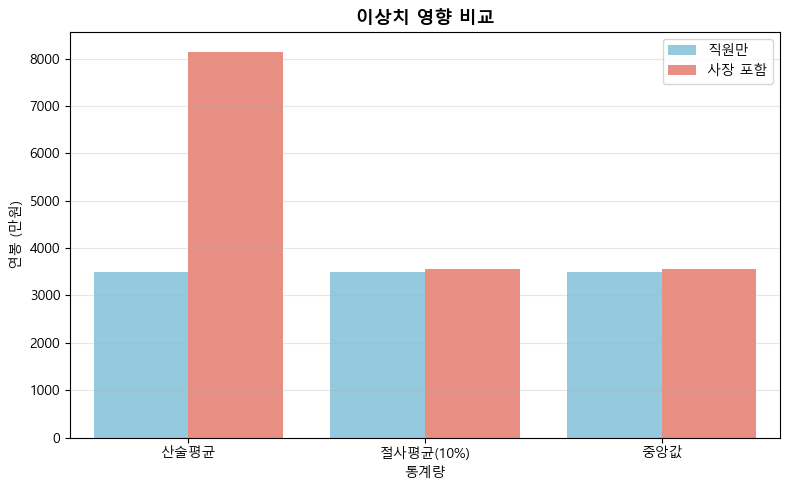

In [20]:
# 비교 막대그래프
fig, ax = plt.subplots(figsize=(8, 5))

compare_df = pd.DataFrame({
    '통계량': ['산술평균', '절사평균(10%)', '중앙값'] * 2,
    '값': [employees.mean(), stats.trim_mean(employees, 0.10), employees.median(),
           with_ceo.mean(), stats.trim_mean(with_ceo, 0.10), with_ceo.median()],
    '구분': ['직원만'] * 3 + ['사장 포함'] * 3
})
display(compare_df) #값 확인

sns.barplot(data=compare_df, x='통계량', y='값', hue='구분', palette=['skyblue', 'salmon'], ax=ax)
ax.set_title('이상치 영향 비교', fontsize=13, fontweight='bold')
ax.set_ylabel('연봉 (만원)')
ax.legend(title='')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---

## Part 5: 기술통계 - 산포도 (데이터가 얼마나 퍼져 있나?)

### "평균은 같은데, 데이터가 다를 수 있다!"

산포도란 **"데이터가 얼마나 흩어져 있는가"** 를 숫자로 나타낸 것입니다.

예를 들어, 시험 평균이 둘 다 70점이라도
- A반: 모두 65~75점 사이 → **모여 있음** (산포가 작음)
- B반: 30점~100점까지 다양 → **흩어져 있음** (산포가 큼)

평균만 보면 A반과 B반이 같아 보이지만, 산포도를 보면 전혀 다른 데이터라는 걸 알 수 있습니다!

![같은 평균 다른 표준편차](images/pr_01/same_mean_other_std.png)

#### 산포도 지표 비교

| 지표 | 계산 방식 | 중심 기준 | 이상치 민감도 |
|------|----------|:--------:|:-----------:|
| 분산, 표준편차 | 각 값이 평균에서 떨어진 거리 | O (평균) | 민감 |
| IQR | Q3 - Q1 (중앙 50% 폭) | △ (중앙값) | 강건 |
| 범위 | 최댓값 - 최솟값 | X | 매우 민감 |

#### 수식 정리
- **편차**: $d_i = x_i - \bar{x}$
- **모분산**: $\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x})^2$
- **표본분산**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$ (베셀 보정)
- **표준편차**: $\sigma = \sqrt{\sigma^2}$ (모집단), $s = \sqrt{s^2}$ (표본)
- **범위**: $R = x_{max} - x_{min}$
- **IQR**: $IQR = Q_3 - Q_1$

#### 이상치 탐지 방법

**1. IQR 방법**: $\quad x < Q_1 - 1.5 \cdot IQR \quad \text{or} \quad x > Q_3 + 1.5 \cdot IQR$

**2. Z-score 방법**: $\quad |z| = \left|\frac{x - \bar{x}}{s}\right| > k \quad (k = 2 \sim 3)$

<img src="images/pr_01/normal_dist.png" width="50%">

> IQR 방법은 중앙값 기반이라 비대칭 분포에 강건하고, Z-score는 정규분포 가정 시 적합합니다.


실생활 예시: 같은 평균 수익률, 다른 리스크
두 투자 상품의 평균 수익률이 모두 8%라면, 어떤 걸 고르겠습니까?


,구분,평균 수익률(%),표준편차(%),최악의 수익률,최고의 수익률
0,상품A,7.99,3.01,-3.77,19.78
1,상품B,8.14,10.01,-30.56,52.79


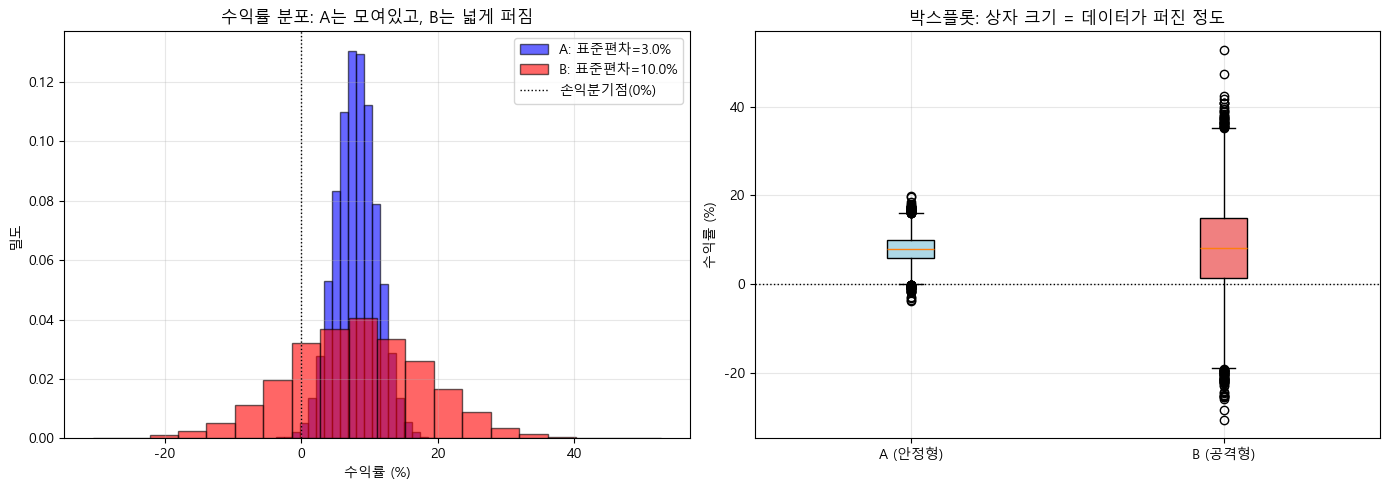

In [21]:
# 실생활 예시: 같은 수익률, 다른 리스크
print("\n" + "="*60)
print("실생활 예시: 같은 평균 수익률, 다른 리스크")
print("="*60)
print("두 투자 상품의 평균 수익률이 모두 8%라면, 어떤 걸 고르겠습니까?")

# 두 투자 상품 시뮬레이션
investment_A = np.random.normal(8,3,10000) #1000개 데이터 샘플링
investment_B = np.random.normal(8,10,10000) #1000개 데이터 샘플링

invest_df = pd.DataFrame({'구분': ['상품A', '상품B'],
    '평균 수익률(%)' : [investment_A.mean(), investment_B.mean()],
    '표준편차(%)' : [investment_A.std(), investment_B.std()],
    '최악의 수익률' : [investment_A.min(), investment_B.min()],
    '최고의 수익률' : [investment_A.max(), investment_B.max()],
})
display(invest_df.round(2))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
axes[0].hist(investment_A, bins=20, alpha=0.6, color='blue', edgecolor='black',
             label=f'A: 표준편차={investment_A.std():.1f}%', density=True)
axes[0].hist(investment_B, bins=20, alpha=0.6, color='red', edgecolor='black',
             label=f'B: 표준편차={investment_B.std():.1f}%', density=True)
axes[0].axvline(0, color='black', linestyle=':', linewidth=1, label='손익분기점(0%)')
axes[0].set_xlabel('수익률 (%)')
axes[0].set_ylabel('밀도')
axes[0].set_title('수익률 분포: A는 모여있고, B는 넓게 퍼짐')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 박스플롯
bp = axes[1].boxplot([investment_A, investment_B],
                     labels=['A (안정형)', 'B (공격형)'],
                     patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1].axhline(0, color='black', linestyle=':', linewidth=1)
axes[1].set_ylabel('수익률 (%)')
axes[1].set_title('박스플롯: 상자 크기 = 데이터가 퍼진 정도')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
print("\n" + "="*60)
print("Part 5: 기술통계 - 산포도")
print("="*60)

# Wine 알코올 도수 사용
data = wine_df['alcohol']
display(data.head())

# (1) 편차 - 각 값이 평균에서 얼마나 떨어져 있는가
deviations = data - data.mean()
print("편차 : ")
display(deviations.head())

# (2) 분산 - 편차 제곱의 평균
# 데이터의 개수가 많으면 모집단과 표본집단의 값은 비슷해진다.
print(f"분산 (모집단) : {data.var(ddof=0):.4f}")
print(f"분산 (표본집단): {data.var(ddof=1):.4f}") 

# (3) 표준편차 - 분산에 루트를 씌워서 원래 단위로 되돌림
print(f"표준편차 (모집단) : {data.std(ddof=0):.4f}")
print(f"표준편차 (표본집단): {data.std(ddof=1):.4f}") 

# (4) 범위 - 가장 단순한 산포 지표
print(f"범위(max-min): {data.max() - data.min():.4f}") 


# (5) 백분위수와 IQR
Q1 = data.quantile(0.25) 
Q2 = data.quantile(0.5) 
Q3 = data.quantile(0.75) 
print(f"Q1: {Q1}") 
print(f"Q2: {Q2}") 
print(f"Q3: {Q3}") 
print(f"IQR: {Q3 - Q1:.4f}") 

# (6) 이상치 판별
# 6-1) IQR 기반 이상치 판별 방법
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR
iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)]
print('IQR 이상치:')
print('IQR 이상치 개수:', len(iqr_outliers))
display(iqr_outliers.head())

# 6-2) Z-Score 방법
z_scores = (data - data.mean()) / data.std()
z_outliers_2 = data[np.abs(z_scores) > 2]
z_outliers_3 = data[np.abs(z_scores) > 3]
print('Z-score 이상치:')
print('|Z-score| > 2 이상치 개수:', len(z_outliers_2))
print('|Z-score| > 3 이상치 개수:', len(z_outliers_3))

# (7) 클래스별 알콜 산포도 비교
class_stats = wine_df.groupby('class_name')['alcohol'].agg([
    ('평균', 'mean'),
    ('분산', 'var'),
    ('표준편차', 'std'),
    ('최소', 'min'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q2', lambda x: x.quantile(0.5)),
    ('Q3', lambda x: x.quantile(0.75)),
    ('최대', 'max'),
    ('범위', lambda x: x.max() - x.min()),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
])
display(class_stats)


Part 5: 기술통계 - 산포도


0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: alcohol, dtype: float64

편차 : 


0    1.229382
1    0.199382
2    0.159382
3    1.369382
4    0.239382
Name: alcohol, dtype: float64

분산 (모집단) : 0.6554
분산 (표본집단): 0.6591
표준편차 (모집단) : 0.8095
표준편차 (표본집단): 0.8118
범위(max-min): 3.8000
Q1: 12.362499999999999
Q2: 13.05
Q3: 13.6775
IQR: 1.3150
IQR 이상치:
IQR 이상치 개수: 0


Series([], Name: alcohol, dtype: float64)

Z-score 이상치:
|Z-score| > 2 이상치 개수: 3
|Z-score| > 3 이상치 개수: 0


,평균,분산,표준편차,최소,Q1,Q2,Q3,최대,범위,IQR
class_name,,,,,,,,,,
class_0,13.744746,0.213560,0.462125,12.85,13.400,13.750,14.100,14.83,1.98,0.7
class_1,12.278732,0.289406,0.537964,11.03,11.915,12.290,12.515,13.86,2.83,0.6
class_2,13.153750,0.281156,0.530241,12.20,12.805,13.165,13.505,14.34,2.14,0.7


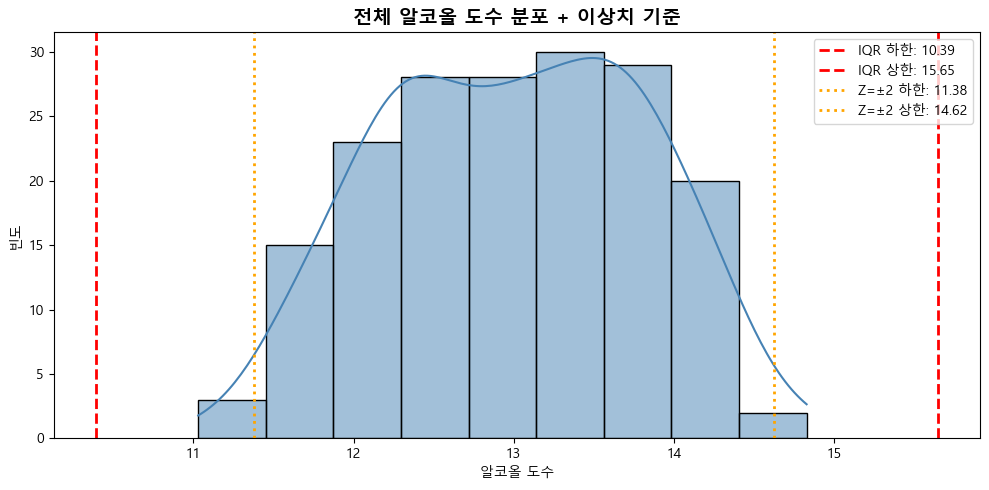

In [23]:
# 전체 알코올 도수 분포 + 이상치 기준선
fig, ax = plt.subplots(figsize=(10, 5))

data = wine_df['alcohol']

# 히스토그램
sns.histplot(data=wine_df, x='alcohol', kde=True, color='steelblue', ax=ax)

# IQR 이상치 기준
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR

# Z-score 이상치 기준 (|Z| > 2)
z_lower = data.mean() - 2 * data.std()
z_upper = data.mean() + 2 * data.std()

# 기준선 표시
ax.axvline(iqr_lower, color='red', linestyle='--', linewidth=2, label=f'IQR 하한: {iqr_lower:.2f}')
ax.axvline(iqr_upper, color='red', linestyle='--', linewidth=2, label=f'IQR 상한: {iqr_upper:.2f}')
ax.axvline(z_lower, color='orange', linestyle=':', linewidth=2, label=f'Z=±2 하한: {z_lower:.2f}')
ax.axvline(z_upper, color='orange', linestyle=':', linewidth=2, label=f'Z=±2 상한: {z_upper:.2f}')

ax.set_title('전체 알코올 도수 분포 + 이상치 기준', fontsize=14, fontweight='bold')
ax.set_xlabel('알코올 도수')
ax.set_ylabel('빈도')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

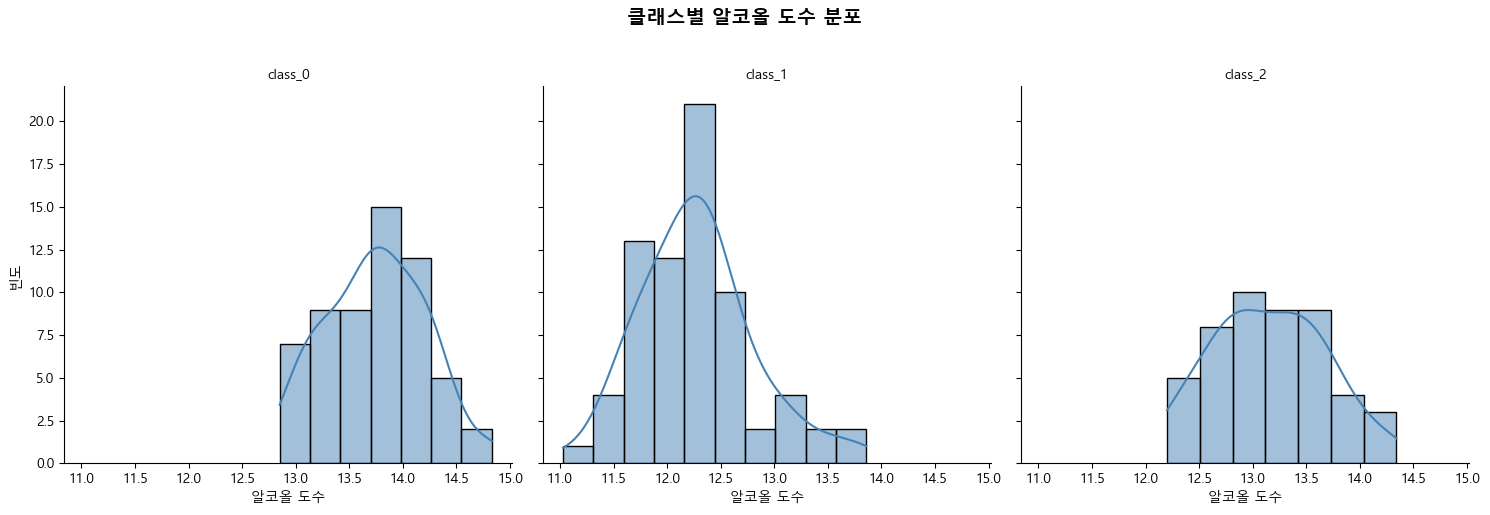

In [24]:
# 클래스별 알코올 도수 히스토그램

# - FacetGrid : 하나 이상의 범주형 변수 조합별로 동일한 차트를 나란히 비교할 때 사용
g = sns.FacetGrid(wine_df, col='class_name', height=5, aspect=1)
g.map_dataframe(sns.histplot, x='alcohol', kde=True, color='steelblue')
g.set_titles('{col_name}')
g.set_axis_labels('알코올 도수', '빈도')
g.figure.suptitle('클래스별 알코올 도수 분포', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

### 참고: 왜 표본분산은 $N$이 아니라 $N-1$로 나눌까? (베셀 보정)

#### 문제 상황
모분산($\sigma^2$)을 알고 싶지만, 전체 모집단을 조사할 수 없어 표본으로 추정해야 합니다.

$\text{모분산} = \frac{\sum(X_i - \mu)^2}{N} \quad (\mu: \text{모평균})$
$\text{표본분산} = \frac{\sum(X_i - \bar{X})^2}{n-1} \quad (\bar{X}: \text{표본평균})$

#### 근본 원인: 표본평균의 특성

표본평균 $\bar{X}$는 해당 표본 데이터들의 **"맞춤형 중심점"** 입니다.

```plain
    ●     ●     ●     ●     ●  ← 표본 데이터
    └─────┴─────X̄─────┴─────┘
              표본평균
    (이 5개 데이터의 중심이 되도록 계산됨)
```

반면, 모평균 $\mu$는 전체 모집단의 중심이므로 표본 데이터들과 더 멀 수 있습니다.

**→ 표본평균으로 분산을 구하면 모평균으로 구한 분산보다 더 작아집니다!**

#### 구체적 예시

**상황**: 5명의 키 측정
- 표본 데이터: 168, 172, 169, 171, 176 cm
- 모평균($\mu$) = 170 cm (전체 국민 평균)
- 표본평균($\bar{X}$) = 171.2 cm (5명의 평균)

**개별 데이터 176cm의 경우**: 
```plain
    170(μ)    171.2(X̄)               176(Xᵢ)
   모평균     표본평균                데이터
      |          |                      |
      |←──1.2───→|←────────4.8─────────→|
      |                                 |
      |←──────────────6────────────────→|
            모평균으로부터의 거리
```

| 기준 | 계산 | 결과 |
|------|------|------|
| 표본평균 기준 | $(176 - 171.2)^2$ | 23.04 |
| 모평균 기준 | $(176 - 170)^2$ | 36.00 |

**23.04 < 36.00 → 표본평균 기준이 더 작게 계산됨!**

#### 핵심: 자유도 (Degrees of Freedom)

표본평균 $\bar{X}$를 구하면 **제약 조건 1개**가 생깁니다:
$\sum_{i=1}^{n}(X_i - \bar{X}) = 0$

따라서 $n$개 데이터 중 **독립적으로 변할 수 있는 개수는 $n-1$개**입니다.

> 예) 평균이 5인 데이터 3개: $3, 7, \square$
> → 앞 2개를 정하면 마지막 1개는 **자동으로 5** (자유도 = 2 = $n-1$)

#### 결론
- $N$으로 나누면: 분산을 **과소추정** (편향)
- $N-1$로 나누면: **불편 추정량** (정확)

$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$

#### 실무에서 중요한가?

| 표본 크기 | 영향 |
|----------|------|
| 작은 표본 (n < 30) | 자유도 무시하면 큰 오류 발생 |
| 큰 표본 (n > 100) | 별 차이 없음 |

#### Pandas에서 분산 계산
```python
import pandas as pd

scores = pd.Series([85, 90, 78, 92, 88])

scores.var()        # n-1로 나눔 (표본분산) - pandas 기본값
scores.var(ddof=0)  # n으로 나눔 (모분산)
```

> `ddof` = Delta Degrees of Freedom (자유도 조정값)
> - `ddof=1`: 자유도 1 빼기 (표본분산) - **pandas 기본값**
> - `ddof=0`: 자유도 안 빼기 (모분산)

#### ⚠️ 주의: 데이터가 1개일 때 분산 및 표준편차 계산
- pandas는 기본적으로 **표본분산(ddof=1)** 을 사용합니다. 데이터가 1개면 분모가 `n-1=0`이 되어 **NaN**이 반환됩니다.
- ddof 파라미터를 사용하는 모든 함수가 이러한 문제를 갖습니다

## Part 5.1: 변동계수 (CV) - 상대적 산포

### 변동계수란?

변동계수(Coefficient of Variation)는 **표준편차를 평균으로 나눈 값**으로, 데이터의 **상대적인 퍼짐 정도**를 나타냅니다.

$CV = \frac{s}{\bar{x}} \times 100\%$

### 왜 필요한가? - 표준편차의 한계

표준편차는 **원래 데이터와 같은 단위**를 갖기 때문에, 두 가지 상황에서 비교가 어렵습니다.

**문제 1: 단위가 다른 변수 비교**

| 변수 | 평균 | 표준편차 | 어느 쪽이 더 퍼져있나? |
|------|------|----------|:--------------------:|
| 키 | 170cm | 10cm | ? |
| 몸무게 | 70kg | 8kg | ? |

→ cm와 kg는 비교 불가!

**문제 2: 스케일이 다른 그룹 비교**

| 그룹 | 평균 매출 | 표준편차 | 어느 쪽이 더 불안정? |
|------|----------|----------|:-----------------:|
| 대기업 | 1조원 | 1000억원 | ? |
| 스타트업 | 10억원 | 5억원 | ? |

→ 절대값만 보면 대기업이 더 퍼져있지만, 정말 그런가?

### 해결책: CV로 무단위(%) 변환

평균으로 나눠서 **무단위(%)** 로 만들면 비교 가능!

**문제 1 해결:**

| 변수 | 평균 | 표준편차 | CV |
|------|------|----------|-----|
| 키 | 170cm | 10cm | **5.9%** |
| 몸무게 | 70kg | 8kg | **11.4%** |

→ **몸무게가 상대적으로 더 퍼져있음**

**문제 2 해결:**

| 그룹 | 평균 매출 | 표준편차 | CV |
|------|----------|----------|-----|
| 대기업 | 1조원 | 1000억원 | **10%** |
| 스타트업 | 10억원 | 5억원 | **50%** |

→ 절대값은 대기업이 크지만, **스타트업이 상대적으로 훨씬 불안정**

In [ ]:
print("\n" + "="*60)
print("Part 5.1: 변동계수 (CV) - 상대적 산포")
print("="*60)

# (1) 변동계수 계산 함수
def cv(data):
    """변동계수(%) 계산"""
    pass

# (2) 문제 1: 단위가 다른 변수 비교 - Iris 데이터 활용
print("\n[1. 단위가 다른 변수 비교]")
print("Iris 데이터: 꽃잎 길이(cm) vs 꽃잎 너비(cm)")
print("(단위는 같지만 스케일이 다른 경우)")

petal_length = iris_df['petal length (cm)']
petal_width = iris_df['petal width (cm)']

# (3) 문제 2: 스케일이 다른 그룹 비교 - Wine 데이터 활용
print("\n" + "-"*60)
print("[2. 스케일이 다른 변수 비교]")
print("Wine 데이터: alcohol vs malic_acid vs magnesium")

alcohol = wine_df['alcohol']
malic_acid = wine_df['malic_acid']
magnesium = wine_df['magnesium']

---

## Part 6: 기술통계 - 데이터 분포 탐색

### "데이터의 생김새를 눈으로 확인하기" → 4가지 그래프

같은 데이터를 다양한 그래프로 그려보면 서로 다른 정보를 얻을 수 있습니다.

- **박스플롯**: 중앙값, IQR, 이상치를 한눈에

<img src="images/pr_01/box_plot.png" width="50%">

- **히스토그램**: 구간별 빈도 (막대 높이 = 해당 구간에 몇 개?)

- **밀도그림 (KDE)**: 히스토그램을 부드러운 곡선으로 만든 것

<img src="images/pr_01/kde.png" width="40%">


- **바이올린 도표**: 박스플롯 + 밀도그림을 합친 것

<img src="images/pr_01/violin_plot.png" width="40%">

In [ ]:
print("\n" + "="*60)
print("Part 6: 기술통계 - 데이터 분포 탐색")
print("="*60)

# Iris 꽃잎 길이를 4가지 그래프로 그리기
data = iris_df['petal length (cm)']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (1) 박스플롯

# (2) 히스토그램

# (3) 밀도그림 (KDE)

# (4) 바이올린 도표

In [ ]:
# 종별 분포 비교 - 그룹 간 차이를 한눈에!
print("\n" + "-"*40)
print("종별 분포 비교: 붓꽃 3종의 꽃잎 길이가 얼마나 다를까?")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# (1) 종별 히스토그램


# (2) 종별 박스플롯


# (3) 종별 바이올린

#### 히스토그램 bins 설정 가이드

| 방법 | 공식/설명 | 특징 |
|------|----------|------|
| **auto** | Sturges와 FD 중 bin이 더 많은 쪽 선택 | 무난한 기본값 |
| **sturges** | $k = 1 + \log_2(n)$ | 단순, 작은 데이터에 적합 |
| **fd** | $h = 2 \cdot IQR \cdot n^{-1/3}$ | IQR 기반, 이상치에 강건 |
| **숫자 직접 지정** | bins=10, 20 등 | 원하는 세밀도로 조절 |
| **도메인 기반** | np.arange(0, 100, 10) | 해석 용이 (예: 나이 10세 단위) |

> 기본값(auto)으로 충분. 봉우리가 안 보이면 bins↑, 울퉁불퉁하면 bins↓

#### KDE bandwidth 설정 가이드

| 방법 | 설명 | 특징 |
|------|------|------|
| **bw_adjust=1.0** | Scott/Silverman 자동 계산값 × 1.0 | 기본값 |
| **bw_adjust=0.5** | 기본값의 0.5배 | 더 뾰족 (세밀) |
| **bw_adjust=2.0** | 기본값의 2배 | 더 부드러움 |

> 기본값(1.0)으로 충분. 봉우리가 안 보이면 bw_adjust↓, 울퉁불퉁하면 bw_adjust↑

In [ ]:
# bins 설정 방법 비교
data = iris_df['petal length (cm)']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# (1) 자동 (기본값)
sns.histplot(data, bins='auto', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title("bins='auto' (Sturges vs FD 중 많은 쪽)", fontweight='bold')

# (2) Sturges
sns.histplot(data, bins='sturges', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title("bins='sturges'", fontweight='bold')

# (3) Freedman-Diaconis
sns.histplot(data, bins='fd', ax=axes[0, 2], color='steelblue')
axes[0, 2].set_title("bins='fd' (이상치에 강건)", fontweight='bold')

# (4) 숫자 직접 지정 - 적음
sns.histplot(data, bins=5, ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title("bins=5 (너무 뭉개짐)", fontweight='bold')

# (5) 숫자 직접 지정 - 많음
sns.histplot(data, bins=30, ax=axes[1, 1], color='steelblue')
axes[1, 1].set_title("bins=30 (너무 세밀)", fontweight='bold')

# (6) 도메인 기반 - 0.5cm 단위
sns.histplot(data, bins=np.arange(0, 8, 0.5), ax=axes[1, 2], color='steelblue')
axes[1, 2].set_title("도메인 기반 (0.5cm 단위)", fontweight='bold')

plt.suptitle('bins 설정에 따른 히스토그램 변화', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# KDE bandwidth 설정 방법 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.kdeplot(data, bw_adjust=0.5, ax=axes[0], fill=True, color='steelblue')
axes[0].set_title('bw_adjust=0.5 (뾰족)', fontweight='bold')

sns.kdeplot(data, bw_adjust=1.0, ax=axes[1], fill=True, color='steelblue')
axes[1].set_title('bw_adjust=1.0 (기본값)', fontweight='bold')

sns.kdeplot(data, bw_adjust=2.0, ax=axes[2], fill=True, color='steelblue')
axes[2].set_title('bw_adjust=2.0 (부드러움)', fontweight='bold')

plt.suptitle('KDE bandwidth 설정에 따른 밀도 곡선 변화', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## Part 7: 왜도(Skewness)와 첨도(Kurtosis)

### 왜도 - "데이터가 어느 쪽으로 치우쳐 있나?"

<img src="images/pr_01/왜도.png" width="50%">

왜도는 분포의 **비대칭 정도**를 측정합니다.

| 왜도 값 | 분포 모양 | 의미 | 예시 |
|---------|----------|------|------|
| **= 0** | 좌우 대칭 | 양쪽이 거울처럼 같음 | 키, IQ 분포 |
| **> 0 (양의 왜도)** | 오른쪽 꼬리가 김 | 대부분 작은 값, 가끔 큰 값 | 연봉, 집값 |
| **< 0 (음의 왜도)** | 왼쪽 꼬리가 김 | 대부분 큰 값, 가끔 작은 값 | 시험 점수(쉬운 시험) |


### 첨도 - "극단적인 일이 얼마나 자주 일어나나?"

첨도는 단순히 "뾰족한 정도"가 아니라, **꼬리의 두께(극단값 발생 가능성)** 를 측정합니다.

<img src="images/pr_01/첨도.png" width="30%">

| 첨도 값 (초과첨도) | 꼬리 두께 | 의미 | 극단값 발생 |
|-------------------|----------|------|-----------|
| **= 0** | 정규분포와 동일 | 기준(정규분포) | 보통 |
| **> 0 (양의 첨도)** | 꼬리가 두꺼움 | 극단값이 예상보다 자주 발생 | 많음 |
| **< 0 (음의 첨도)** | 꼬리가 얇음 | 극단값이 거의 없음 | 적음 |

#### 참고: 극단값 vs 이상치

| 용어 | 의미 | 판단 기준 | 예시 |
|------|------|----------|------|
| **극단값 (Extreme Value)** | 분포의 꼬리에 있는 드문 값 | 상대적 위치 | 억대 연봉자 |
| **이상치 (Outlier)** | 데이터 패턴에서 벗어난 비정상적 값 | 통계적 기준 (IQR, Z-score) | 연봉 -500만원 (입력 오류) |

> 극단값은 자연스러운 변동이지만, 이상치는 오류나 특수 상황일 수 있음. 모든 극단값이 이상치는 아님.

### 꼬리 리스크 (Tail Risk) - 왜 첨도가 중요한가?

분포 그래프에서 양 끝부분을 **"꼬리"** 라고 합니다.

꼬리가 두꺼우면(= 높은 첨도) 극단적 손실이나 이익이 **예상보다 자주** 발생합니다.

- 예: "주가는 보통 ±1% 변동하지만, 가끔 ±10% 폭락/폭등한다"
- 2008년 금융위기 때, 정규분포(첨도=0)만 가정한 리스크 모델들이 꼬리 리스크를 놓쳐 실패

> **핵심: 첨도는 "평범하지 않은 일이 일어날 가능성"을 측정하는 지표입니다.**
> 리스크 측정에서 첨도를 무시하면 극단적 손실을 과소평가하게 됩니다!

#### 수식 정리

- **왜도**: $\gamma_1 = \frac{1}{n}\sum_{i=1}^{n}\left(\frac{x_i - \bar{x}}{s}\right)^3$

- **첨도 (초과첨도)**: $\gamma_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\frac{x_i - \bar{x}}{s}\right)^4 - 3$

- 정규분포 기준으로 $-3$을 빼서 0이 기준이 됨 (초과첨도, excess kurtosis)

In [ ]:
# Iris 꽃잎 길이 사용
data = iris_df['petal length (cm)']

# (1) 왜도와 첨도 계산


# (2) 종별 왜도와 첨도 비교


In [ ]:
# (3) 시각화: 종별 KDE 비교
fig, ax = plt.subplots(figsize=(10, 5))

for species in iris_df['species_name'].unique():
    subset = iris_df[iris_df['species_name'] == species]['petal length (cm)']
    sns.kdeplot(subset, label=f"{species} (왜도={subset.skew():.2f}, 첨도={subset.kurt():.2f})", ax=ax, fill=True, alpha=0.3)

ax.set_title('종별 꽃잎 길이 분포', fontweight='bold')
ax.set_xlabel('꽃잎 길이 (cm)')
ax.set_ylabel('밀도')
ax.legend()

plt.tight_layout()
plt.show()

---

# 기술통계 핵심 함수 정리

## 1. 데이터 탐색

| 함수 | 설명 | 예시 |
|------|------|------|
| `df.info()` | 데이터 타입, 결측치 확인 | `iris_df.info()` |
| `df.describe()` | 수치형 기술통계 요약 | `iris_df.describe()` |
| `df.describe(include='object')` | 범주형 기술통계 요약 | `iris_df.describe(include='object')` |
| `df['col'].value_counts()` | 범주별 빈도 | `df['species'].value_counts()` |
| `df['col'].value_counts(normalize=True)` | 범주별 비율 | `df['species'].value_counts(normalize=True)` |

## 2. 중심 지표 (대표값)

| 함수 | 설명 | 예시 |
|------|------|------|
| `df['col'].mean()` | 산술평균 | `df['petal_length'].mean()` |
| `df['col'].median()` | 중앙값 | `df['petal_length'].median()` |
| `df['col'].mode()` | 최빈값 | `df['petal_length'].mode()` |
| `stats.trim_mean(data, 비율)` | 절사평균 (scipy) | `stats.trim_mean(df['petal_length'], 0.1)` |
| `np.average(data, weights=가중치)` | 가중평균 (numpy) | `np.average(df['petal_length'], weights=df['weight'])` |

> **참고**: 절사평균과 가중평균은 pandas 기본 메서드가 없어서 scipy/numpy를 사용합니다.
> 
> ```python
> # 절사평균 - 직접 계산 (상하 10% 제거)
> sorted_data = df['petal_length'].sort_values()
> n = len(sorted_data)
> trim_n = int(n * 0.1)
> sorted_data.iloc[trim_n : n - trim_n].mean()
> 
> # 가중평균 - 직접 계산
> (df['value'] * df['weight']).sum() / df['weight'].sum()
> ```
> 
> groupby에서 사용하려면 `apply`나 `agg`에 lambda로 적용:
> ```python
> # 절사평균
> df.groupby('species')['petal_length'].apply(lambda x: stats.trim_mean(x, 0.1))
> 
> # 가중평균 (가중치 컬럼이 있을 때)
> df.groupby('species').apply(lambda g: np.average(g['petal_length'], weights=g['weight']))
> ```

## 3. 산포도

| 함수 | 설명 | 예시 |
|------|------|------|
| `df['col'].var()` | 표본분산 (n-1) | `df['petal_length'].var()` |
| `df['col'].var(ddof=0)` | 모분산 (n) | `df['petal_length'].var(ddof=0)` |
| `df['col'].std()` | 표본표준편차 | `df['petal_length'].std()` |
| `df['col'].std(ddof=0)` | 모표준편차 | `df['petal_length'].std(ddof=0)` |
| `df['col'].max() - df['col'].min()` | 범위 | `df['petal_length'].max() - df['petal_length'].min()` |
| `df['col'].quantile(q)` | 백분위수 | `df['petal_length'].quantile([0.25, 0.5, 0.75])` |
| `Q3 - Q1` | IQR | `df['petal_length'].quantile(0.75) - df['petal_length'].quantile(0.25)` |
| `df['col'].std() / df['col'].mean() * 100` | 변동계수 (CV, %) | `df['petal_length'].std() / df['petal_length'].mean() * 100` |

> **변동계수(CV)**: 단위가 다른 변수 간 상대적 산포 비교에 사용. CV가 클수록 평균 대비 변동이 큼.


## 4. 그룹별 집계
```python
# 기본 집계
df.groupby('species')['petal_length'].mean()

# 다중 집계
df.groupby('species')['petal_length'].agg(['mean', 'median', 'std', 'min', 'max'])

# 커스텀 집계
df.groupby('species')['petal_length'].agg([
    ('평균', 'mean'),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))
])
```

## 5. 이상치 탐지
```python
# IQR 방법
Q1, Q3 = df['petal_length'].quantile(0.25), df['petal_length'].quantile(0.75)
IQR = Q3 - Q1
outliers = df['petal_length'][(df['petal_length'] < Q1 - 1.5*IQR) | (df['petal_length'] > Q3 + 1.5*IQR)]

# Z-score 방법
z_scores = (df['petal_length'] - df['petal_length'].mean()) / df['petal_length'].std()
outliers = df['petal_length'][np.abs(z_scores) > 2]  # 또는 > 3
```

## 6. 분포 형태

| 함수 | 설명 | 예시 |
|------|------|------|
| `df['col'].skew()` | 왜도 | `df['petal_length'].skew()` |
| `df['col'].kurtosis()` | 첨도 (초과첨도) | `df['petal_length'].kurtosis()` |


---

# 실습 완료!

이것으로 1회차 이론 실습이 끝났습니다.

**실습 과제**는 `practice_01_assignment.ipynb` 파일에서 풀어보세요.

| 과제 | 주제 |
|------|------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값) |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수) |
| 문제 3 | 분포의 형태 (왜도, 첨도) |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 |